# ROSHAN POUDEL - LAB07

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

2023-03-22 17:00:35.048680: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10


2023-03-22 17:00:38.118751: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


375/375 [==============================] - 3s 7ms/step - loss: 671.9650 - accuracy: 0.4733 - val_loss: 5.4057 - val_accuracy: 0.3021
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 3.9823 - accuracy: 0.3045 - val_loss: 2.6560 - val_accuracy: 0.2988
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 2.7511 - accuracy: 0.2870 - val_loss: 2.3216 - val_accuracy: 0.2977
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 2.8815 - accuracy: 0.2819 - val_loss: 5.5263 - val_accuracy: 0.2129
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 2.6512 - accuracy: 0.2561 - val_loss: 2.0904 - val_accuracy: 0.2948
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 2.5622 - accuracy: 0.2792 - val_loss: 3.1364 - val_accuracy: 0.2833
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 2.6720 - accuracy: 0.2814 - val_loss: 38.0964 - val_accuracy: 0.3843
Epoch 8/10
375

**The same model with a more appropriate learning rate**

In [3]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3762 - accuracy: 0.9085 - val_loss: 0.1412 - val_accuracy: 0.9589
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1407 - accuracy: 0.9640 - val_loss: 0.1373 - val_accuracy: 0.9680
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1088 - accuracy: 0.9738 - val_loss: 0.1591 - val_accuracy: 0.9683
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1037 - accuracy: 0.9774 - val_loss: 0.2001 - val_accuracy: 0.9682
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0919 - accuracy: 0.9821 - val_loss: 0.2083 - val_accuracy: 0.9679
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0807 - accuracy: 0.9841 - val_loss: 0.2149 - val_accuracy: 0.9700
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0697 - accuracy: 0.9861 - val_loss: 0.2215 - val_accuracy: 0.9752
Epoch 

### Increasing model capacity

**A simple logistic regression on MNIST**

In [4]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.6690 - accuracy: 0.8344 - val_loss: 0.3580 - val_accuracy: 0.9037
Epoch 2/20
375/375 [==============================] - 0s 948us/step - loss: 0.3514 - accuracy: 0.9025 - val_loss: 0.3062 - val_accuracy: 0.9163
Epoch 3/20
375/375 [==============================] - 0s 943us/step - loss: 0.3154 - accuracy: 0.9123 - val_loss: 0.2896 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 0s 945us/step - loss: 0.2992 - accuracy: 0.9170 - val_loss: 0.2817 - val_accuracy: 0.9217
Epoch 5/20
375/375 [==============================] - 0s 951us/step - loss: 0.2896 - accuracy: 0.9196 - val_loss: 0.2757 - val_accuracy: 0.9226
Epoch 6/20
375/375 [==============================] - 0s 952us/step - loss: 0.2828 - accuracy: 0.9215 - val_loss: 0.2716 - val_accuracy: 0.9253
Epoch 7/20
375/375 [==============================] - 0s 951us/step - loss: 0.2779 - accuracy: 0.9223 - val_loss: 0.2677 - val_accuracy: 0

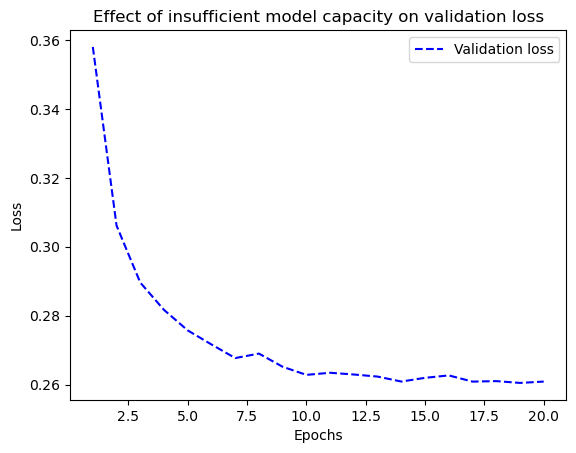

In [5]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [6]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3562 - accuracy: 0.8978 - val_loss: 0.1790 - val_accuracy: 0.9481
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1605 - accuracy: 0.9520 - val_loss: 0.1369 - val_accuracy: 0.9610
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1112 - accuracy: 0.9665 - val_loss: 0.1173 - val_accuracy: 0.9644
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9742 - val_loss: 0.1007 - val_accuracy: 0.9701
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.1008 - val_accuracy: 0.9706
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0554 - accuracy: 0.9834 - val_loss: 0.0992 - val_accuracy: 0.9729
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0948 - val_accuracy: 0.9733
Epoch 

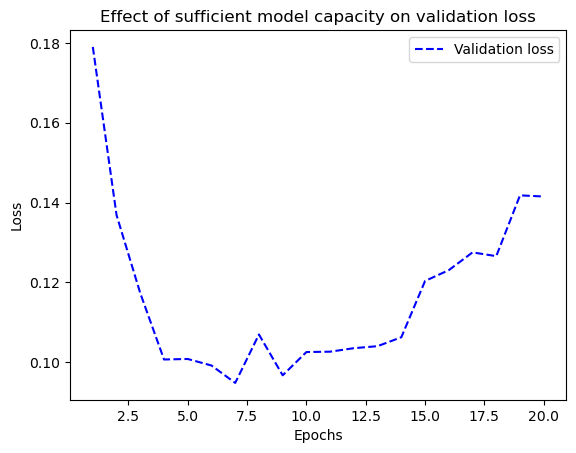

In [7]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of sufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Regularizing your model

#### Reducing the network's size

**Original model**

In [8]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5340 - accuracy: 0.7889 - val_loss: 0.4065 - val_accuracy: 0.8709
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3278 - accuracy: 0.8987 - val_loss: 0.3181 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2395 - accuracy: 0.9227 - val_loss: 0.2807 - val_accuracy: 0.8931
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1873 - accuracy: 0.9403 - val_loss: 0.2824 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1523 - accuracy: 0.9510 - val_loss: 0.2951 - val_accuracy: 0.8820
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1254 - accuracy: 0.9619 - val_loss: 0.2854 - val_accuracy: 0.8900
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1022 - accuracy: 0.9691 - val_loss: 0.3075 - val_accuracy: 0.8844
Epoch 8/20
30

**Version of the model with lower capacity**

In [9]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6561 - accuracy: 0.6149 - val_loss: 0.6188 - val_accuracy: 0.8030
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.5832 - accuracy: 0.7679 - val_loss: 0.5735 - val_accuracy: 0.7200
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.5345 - accuracy: 0.8165 - val_loss: 0.5365 - val_accuracy: 0.8064
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4974 - accuracy: 0.8515 - val_loss: 0.5173 - val_accuracy: 0.7955
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.4673 - accuracy: 0.8749 - val_loss: 0.4968 - val_accuracy: 0.8254
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.4425 - accuracy: 0.8935 - val_loss: 0.4831 - val_accuracy: 0.8410
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4210 - accuracy: 0.9101 - val_loss: 0.4681 - val_accuracy: 0.8645
Epoch 8/20
30/30 [

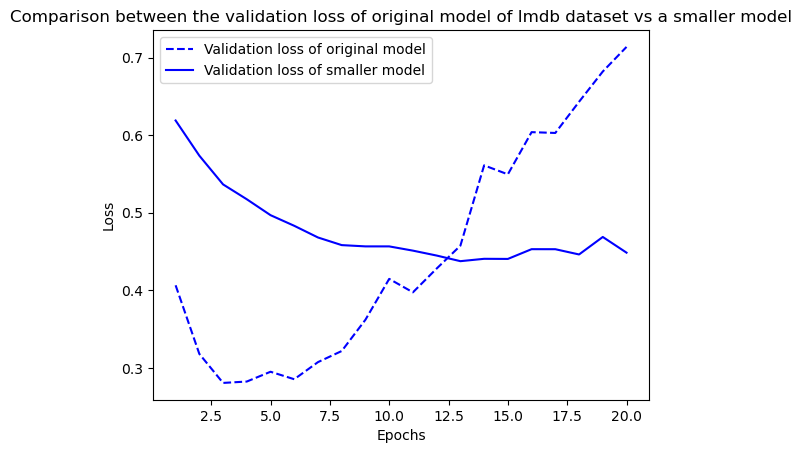

In [10]:
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_smaller, "b-",
         label="Validation loss of smaller model")
plt.title("Comparison between the validation loss of original model of Imdb dataset vs a smaller model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Version of the model with higher capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 8s 251ms/step - loss: 0.5421 - accuracy: 0.7293 - val_loss: 0.3459 - val_accuracy: 0.8576
Epoch 2/20
30/30 [==============================] - 8s 253ms/step - loss: 0.2535 - accuracy: 0.8999 - val_loss: 0.3124 - val_accuracy: 0.8687
Epoch 3/20
30/30 [==============================] - 7s 245ms/step - loss: 0.1489 - accuracy: 0.9448 - val_loss: 0.2786 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 7s 246ms/step - loss: 0.0867 - accuracy: 0.9721 - val_loss: 0.3783 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 7s 244ms/step - loss: 0.0845 - accuracy: 0.9785 - val_loss: 0.3342 - val_accuracy: 0.8742
Epoch 6/20
30/30 [==============================] - 7s 241ms/step - loss: 0.0074 - accuracy: 0.9995 - val_loss: 0.5002 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 7s 243ms/step - loss: 8.2015e-04 - accuracy: 0.9999 - val_loss: 0.6230 - val_accuracy: 0.8814
Ep

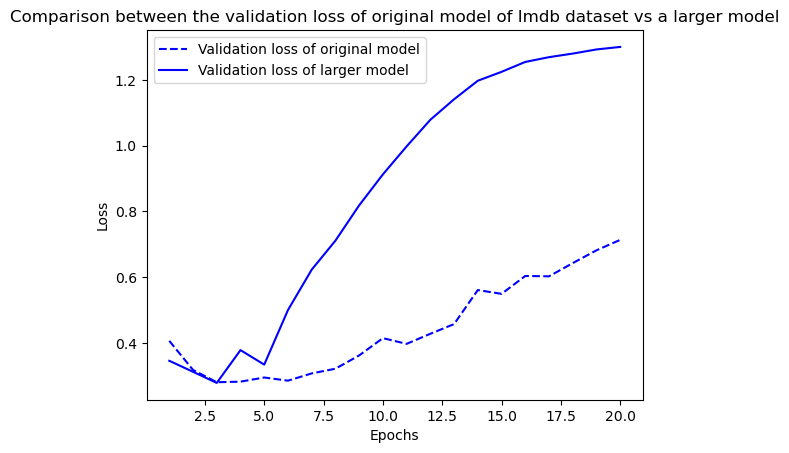

In [12]:
val_loss_original = history_original.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_larger, "b-",
         label="Validation loss of larger model")
plt.title("Comparison between the validation loss of original model of Imdb dataset vs a larger model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5858 - accuracy: 0.7959 - val_loss: 0.4534 - val_accuracy: 0.8724
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3933 - accuracy: 0.8957 - val_loss: 0.3867 - val_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3340 - accuracy: 0.9116 - val_loss: 0.3654 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3006 - accuracy: 0.9249 - val_loss: 0.3582 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2795 - accuracy: 0.9325 - val_loss: 0.3783 - val_accuracy: 0.8768
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2658 - accuracy: 0.9360 - val_loss: 0.3631 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2535 - accuracy: 0.9419 - val_loss: 0.3630 - val_accuracy: 0.8854
Epoch 8/20
30

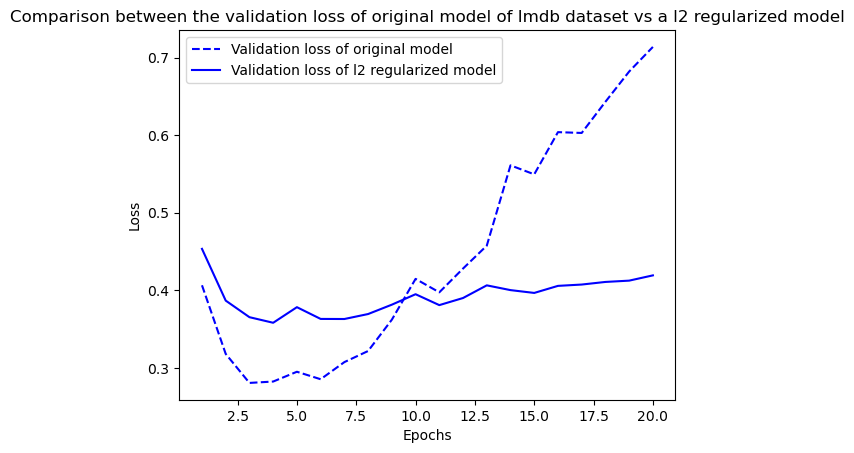

In [14]:
val_loss_original = history_original.history["val_loss"]
val_loss_l2_regularized = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_l2_regularized, "b-",
         label="Validation loss of l2 regularized model")
plt.title("Comparison between the validation loss of original model of Imdb dataset vs a l2 regularized model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Different weight regularizers available in Keras**

In [15]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.6121 - accuracy: 0.6639 - val_loss: 0.4710 - val_accuracy: 0.8447
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4757 - accuracy: 0.7943 - val_loss: 0.3809 - val_accuracy: 0.8666
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3845 - accuracy: 0.8474 - val_loss: 0.3136 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3291 - accuracy: 0.8781 - val_loss: 0.2856 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2824 - accuracy: 0.8999 - val_loss: 0.2740 - val_accuracy: 0.8922
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2493 - accuracy: 0.9127 - val_loss: 0.2736 - val_accuracy: 0.8929
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2193 - accuracy: 0.9264 - val_loss: 0.3061 - val_accuracy: 0.8802
Epoch 8/20
30

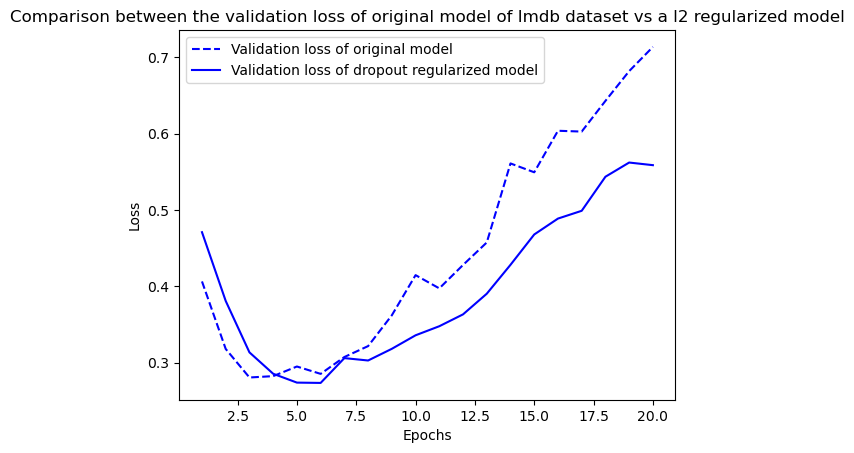

In [17]:
val_loss_original = history_original.history["val_loss"]
val_loss_dropout_regularized = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_dropout_regularized, "b-",
         label="Validation loss of dropout regularized model")
plt.title("Comparison between the validation loss of original model of Imdb dataset vs a l2 regularized model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()